# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split    
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import joblib
import os
import pickle
from imblearn.over_sampling import SMOTE
import re

In [2]:
df = pd.read_csv('UAP Job Kamis (Genap).csv')

# EDA

In [3]:
df.head()

,Unnamed: 0,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1001 non-null   int64 
 1   job_id               1001 non-null   int64 
 2   title                1001 non-null   object
 3   location             985 non-null    object
 4   department           317 non-null    object
 5   salary_range         171 non-null    object
 6   company_profile      840 non-null    object
 7   description          1001 non-null   object
 8   requirements         856 non-null    object
 9   benefits             596 non-null    object
 10  telecommuting        1001 non-null   int64 
 11  has_company_logo     1001 non-null   int64 
 12  has_questions        1001 non-null   int64 
 13  employment_type      859 non-null    object
 14  required_experience  633 non-null    object
 15  required_education   648 non-null    object
 16  indust

In [5]:
df.describe()

,Unnamed: 0,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,501.000000,0.032967,0.822178,0.471528,0.023976
std,289.108111,289.108111,0.178640,0.382554,0.499438,0.153051
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,250.000000,251.000000,0.000000,1.000000,0.000000,0.000000
50%,500.000000,501.000000,0.000000,1.000000,0.000000,0.000000
75%,750.000000,751.000000,0.000000,1.000000,1.000000,0.000000
max,1000.000000,1001.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.count()

Unnamed: 0             1001
job_id                 1001
title                  1001
location                985
department              317
salary_range            171
company_profile         840
description            1001
requirements            856
benefits                596
telecommuting          1001
has_company_logo       1001
has_questions          1001
employment_type         859
required_experience     633
required_education      648
industry                781
function                667
fraudulent             1001
dtype: int64

In [7]:
df.isnull().sum()

Unnamed: 0               0
job_id                   0
title                    0
location                16
department             684
salary_range           830
company_profile        161
description              0
requirements           145
benefits               405
telecommuting            0
has_company_logo         0
has_questions            0
employment_type        142
required_experience    368
required_education     353
industry               220
function               334
fraudulent               0
dtype: int64

In [8]:
df.duplicated().sum()   

np.int64(0)

In [9]:
df.shape

(1001, 19)

In [10]:
nama_kolom = df.columns.tolist()
print(nama_kolom)

['Unnamed: 0', 'job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent']


In [11]:
df_missing = df[df.isnull().any(axis=1)]
display(df_missing)

,Unnamed: 0,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,997,Financial Analyst / Intermediate Accountant,"CA, BC, Langley",Finance,40000-55000,Great Customer Service from Start to FinishWha...,"Centra Construction Group, a well established,...",The successful applicant will have the followi...,NaN,0,1,1,Full-time,Mid-Senior level,Certification,Construction,Finance,0
997,997,998,EXECUTIVE SOUS CHEF,"MY, ,",NaN,55000-65000,Le Meridien is situated in the heart of kuala ...,Responsible for assisting in the direction and...,NaN,NaN,0,1,0,Contract,Executive,NaN,Hospitality,NaN,1
998,998,999,Bookeeper/Supply Manager,"US, NY, Southampton",NaN,35000-45000,NaN,Full time Bookkeeper for local Southampton ene...,Heavy Quickbooks 2013 experience,MedicalPaid Time Off Policy,0,0,1,Full-time,Associate,NaN,Environmental Services,Accounting/Auditing,0
999,999,1000,Project Manager: Software and Web Development,"US, CA, San Diego",NaN,NaN,PINT is a leader in the web industry with 20 y...,PINT is seeking a detail-oriented and impassio...,Project/account management aptitude with the k...,"We offer industry-competitive salaries, health...",0,1,1,Full-time,Associate,Bachelor's Degree,Internet,Project Management,0


In [12]:
df_duplikat = df[df.duplicated(keep='first')]
display(df_duplikat)

,Unnamed: 0,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent


In [13]:
df.columns.tolist()

['Unnamed: 0',
 'job_id',
 'title',
 'location',
 'department',
 'salary_range',
 'company_profile',
 'description',
 'requirements',
 'benefits',
 'telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'fraudulent']

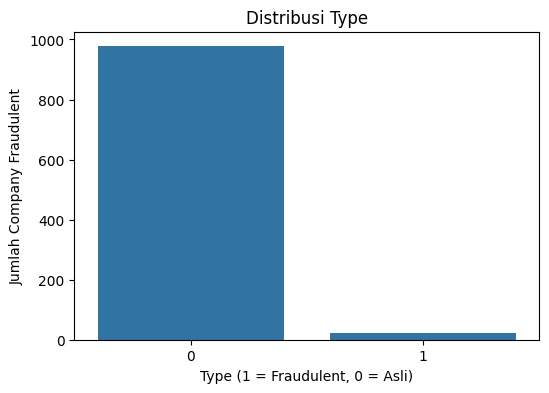

In [14]:
# Distribusi Fraudulent
plt.figure(figsize=(6,4))
sns.countplot(x='fraudulent', data=df)
plt.title('Distribusi Type')
plt.xlabel('Type (1 = Fraudulent, 0 = Asli)')
plt.ylabel('Jumlah Company Fraudulent')
plt.show()

# Data Preprocessing

## Data Reduction

In [15]:
df = df.drop('company_profile', axis=1)
df = df.drop('description', axis=1)
df = df.drop('requirements', axis=1)
df = df.drop('benefits', axis=1)
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('job_id', axis=1)
df = df.drop('salary_range', axis=1)

In [16]:
df.head()

,title,location,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Drop Duplicated

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated(keep='first').sum()

np.int64(0)

## Handling Missing Value

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 1000
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                994 non-null    object
 1   location             978 non-null    object
 2   department           315 non-null    object
 3   telecommuting        994 non-null    int64 
 4   has_company_logo     994 non-null    int64 
 5   has_questions        994 non-null    int64 
 6   employment_type      852 non-null    object
 7   required_experience  628 non-null    object
 8   required_education   642 non-null    object
 9   industry             774 non-null    object
 10  function             660 non-null    object
 11  fraudulent           994 non-null    int64 
dtypes: int64(4), object(8)
memory usage: 101.0+ KB


In [20]:
df.isnull().sum()

title                    0
location                16
department             679
telecommuting            0
has_company_logo         0
has_questions            0
employment_type        142
required_experience    366
required_education     352
industry               220
function               334
fraudulent               0
dtype: int64

In [24]:
df['location'] = df['location'].fillna('Unknown')
df['department'] = df['department'].fillna('Unknown')

In [25]:
df['required_experience'] = df['required_experience'].fillna(df['required_experience'].mode()[0])
df['required_education'] = df['required_education'].fillna(df['required_education'].mode()[0])
df['industry'] = df['industry'].fillna(df['industry'].mode()[0])
df['employment_type'] = df['employment_type'].fillna(df['employment_type'].mode()[0])

In [26]:
df.isnull().sum()

title                    0
location                 0
department               0
telecommuting            0
has_company_logo         0
has_questions            0
employment_type          0
required_experience      0
required_education       0
industry                 0
function               334
fraudulent               0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 1000
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                994 non-null    object
 1   location             994 non-null    object
 2   department           994 non-null    object
 3   telecommuting        994 non-null    int64 
 4   has_company_logo     994 non-null    int64 
 5   has_questions        994 non-null    int64 
 6   employment_type      994 non-null    object
 7   required_experience  994 non-null    object
 8   required_education   994 non-null    object
 9   industry             994 non-null    object
 10  function             660 non-null    object
 11  fraudulent           994 non-null    int64 
dtypes: int64(4), object(8)
memory usage: 101.0+ KB


In [28]:
df.head()

,title,location,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,0,1,0,Other,Internship,Bachelor's Degree,Education Management,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Education Management,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",Unknown,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Handling Categorical Value

In [29]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

In [30]:
df['title'] = df['title'].apply(clean_text)
df['location'] = df['location'].apply(clean_text)
df['department'] = df['department'].apply(clean_text)
df['employment_type'] = df['employment_type'].apply(clean_text)
df['required_experience'] = df['required_experience'].apply(clean_text)
df['required_education'] = df['required_education'].apply(clean_text)
df['industry'] = df['industry'].apply(clean_text)

# Data Transformation

In [31]:
df.head()

,title,location,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,marketing intern,us ny new york,marketing,0,1,0,other,internship,bachelors degree,education management,Marketing,0
1,customer service cloud video production,nz auckland,success,0,1,0,fulltime,not applicable,bachelors degree,marketing and advertising,Customer Service,0
2,commissioning machinery assistant cma,us ia wever,unknown,0,1,0,fulltime,midsenior level,bachelors degree,education management,NaN,0
3,account executive washington dc,us dc washington,sales,0,1,0,fulltime,midsenior level,bachelors degree,computer software,Sales,0
4,bill review manager,us fl fort worth,unknown,0,1,1,fulltime,midsenior level,bachelors degree,hospital health care,Health Care Provider,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 1000
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                994 non-null    object
 1   location             994 non-null    object
 2   department           994 non-null    object
 3   telecommuting        994 non-null    int64 
 4   has_company_logo     994 non-null    int64 
 5   has_questions        994 non-null    int64 
 6   employment_type      994 non-null    object
 7   required_experience  994 non-null    object
 8   required_education   994 non-null    object
 9   industry             994 non-null    object
 10  function             660 non-null    object
 11  fraudulent           994 non-null    int64 
dtypes: int64(4), object(8)
memory usage: 101.0+ KB


In [33]:
le = LabelEncoder()
scaler = MinMaxScaler()

In [34]:
categorical_columns = ['title','location', 'department', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']

In [35]:
numerical_columns = ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']

In [36]:
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [37]:
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [38]:
df.head()

,title,location,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,426,372,78,0.0,1.0,0.0,2,4,1,20,21,0.0
1,140,150,129,0.0,1.0,0.0,1,6,1,48,7,0.0
2,115,272,136,0.0,1.0,0.0,1,5,1,20,35,0.0
3,11,243,115,0.0,1.0,0.0,1,5,1,13,29,0.0
4,75,249,136,0.0,1.0,1.0,1,5,1,32,16,0.0


# Build Model

## Data Splitting

In [39]:
df['fraudulent'] = df['fraudulent'].apply(lambda x: 1 if x == 1 else 0)
X = df.drop('fraudulent', axis=1)
y = df['fraudulent']

In [40]:
# 1. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Balancing

In [41]:
# 2. Data Balancing (SMOTE)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

## Model Training

In [42]:
# 3. Model Training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

## Model Evaluation & Metrics

In [43]:
# 4. Model Evaluation & Metrics
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       193
           1       0.25      0.17      0.20         6

    accuracy                           0.96       199
   macro avg       0.61      0.58      0.59       199
weighted avg       0.95      0.96      0.96       199



## Confusion Matrix

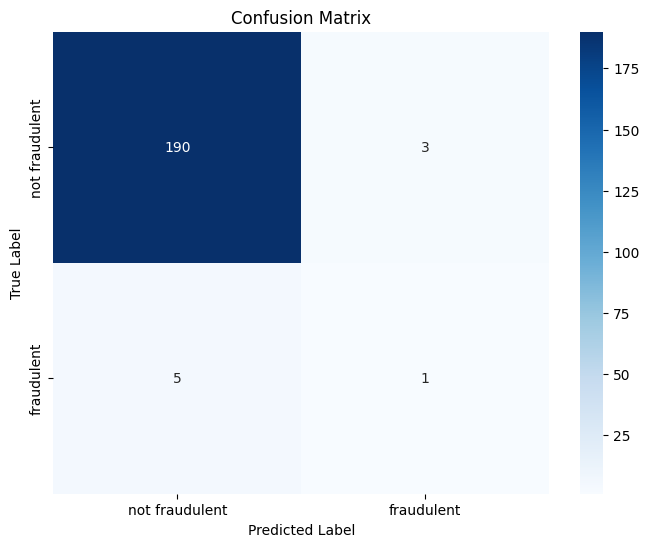

In [49]:
# 5. Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['not fraudulent', 'fraudulent'], yticklabels=['not fraudulent', 'fraudulent'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Train Test Accuracy

In [45]:
# Akurasi pada data pelatihan
y_train_pred = rf_model.predict(X_train_balanced)
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
train_loss = 1 - train_accuracy

In [46]:
# Akurasi pada data uji
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_loss = 1 - test_accuracy

In [47]:
# Tampilkan akurasi dan loss
print(f"Train Accuracy : {train_accuracy:.2f}")
print(f"Train Loss     : {train_loss:.2f}")
print(f"Test Accuracy  : {test_accuracy:.2f}")
print(f"Test Loss      : {test_loss:.2f}")

Train Accuracy : 1.00
Train Loss     : 0.00
Test Accuracy  : 0.96
Test Loss      : 0.04


## Model Saving

In [48]:
# 6. Model Saving (optional)
joblib.dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']